In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df2 = pd.read_csv(r"BBRI.csv")
df3 = pd.read_csv(r"BBNI.csv")
df4 = pd.read_csv(r"BMRI.csv")

In [22]:
print('\nBBRI\n', df2)
print('\nBBNI\n', df3)
print('\nBMRI\n', df4)


BBRI
            Date    Open    High     Low   Close    Adj Close     Volume
0    2018-11-20  3520.0  3520.0  3520.0  3520.0  3399.155273          0
1    2018-11-21  3420.0  3470.0  3350.0  3430.0  3312.245117  138069100
2    2018-11-22  3430.0  3550.0  3430.0  3550.0  3428.125244  118307300
3    2018-11-23  3530.0  3580.0  3470.0  3480.0  3360.528564   77910800
4    2018-11-26  3450.0  3550.0  3450.0  3540.0  3418.468506   82014400
5    2018-11-27  3480.0  3620.0  3480.0  3600.0  3476.408691  172878800
6    2018-11-28  3650.0  3660.0  3580.0  3650.0  3524.692139   96069700
7    2018-11-29  3700.0  3760.0  3680.0  3710.0  3582.632324  138182700
8    2018-11-30  3660.0  3690.0  3610.0  3620.0  3495.722168  211886100
9    2018-12-03  3720.0  3780.0  3690.0  3690.0  3563.318848  136737400
10   2018-12-04  3690.0  3750.0  3680.0  3710.0  3582.632324  134411900
11   2018-12-05  3640.0  3680.0  3610.0  3650.0  3524.692139  140136800
12   2018-12-06  3640.0  3680.0  3610.0  3650.0  3524.692

In [25]:
adj_close2 = df2['Adj Close']
adj_close3 = df3['Adj Close']
adj_close4 = df4['Adj Close']

In [26]:
time2 = np.linspace(1, len(adj_close2), len(adj_close2))
time3 = np.linspace(1, len(adj_close3), len(adj_close3))
time4 = np.linspace(1, len(adj_close4), len(adj_close4))

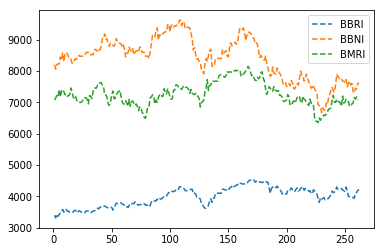

In [27]:
plt.plot(time2, adj_close2, label = 'BBRI', ls = '--')
plt.plot(time3, adj_close3, label = 'BBNI', ls = '--')
plt.plot(time4, adj_close4, label = 'BMRI', ls = '--')
plt.legend(loc = 'upper right')

In [28]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns2 = daily_return(adj_close2)
returns3 = daily_return(adj_close3)
returns4 = daily_return(adj_close4)


mu2 = np.mean(returns2)*252           #koef drift
sig2 = np.std(returns2)*np.sqrt(252.) # koef diffusion

mu3 = np.mean(returns3)*252           #koef drift
sig3 = np.std(returns3)*np.sqrt(252.) # koef diffusion

mu4 = np.mean(returns4)*252           #koef drift
sig4 = np.std(returns4)*np.sqrt(252.) # koef diffusion




In [30]:
print(mu2, sig2)
print(mu3, sig3)
print(mu4, sig4)

0.2340017382494665 0.22393962491770672
-0.03822292821823298 0.2542499993388419
0.03371771539270439 0.2577119951145115


In [31]:
#GBM Exact Solution
#parameter
#so     : initial stock price
#mu     : koef. drift
#sig    : koef. diff.
#W      : brown motion
#T      : Time Period
#N      : number of increment

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


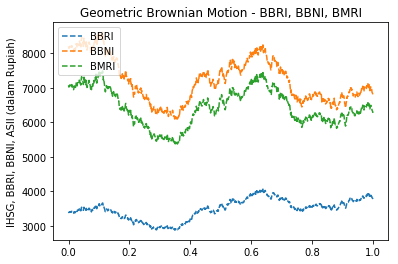

In [33]:
def brownian(seed, N):
    np.random.seed(seed)
    dt = 1./N
    b = np.random.normal(0.,1.,int(N))*np.sqrt(dt)
    W = np.cumsum(b)
    return W, b

def GBM(so, mu, sig, W, T, N):
    t = np.linspace(0., 1., N+1)
    s = []
    s.append(so)
    for i in range(1, int(N+1)):
        drift = (mu - 0.5*sig**2)*t[i]
        diffusion = sig*W[i-1]
        s_temp = so*np.exp(drift+diffusion)
        s.append(s_temp)
    return s, t

N = 2.**10
seed = 1000
W = brownian(seed, N)[0]
T= 1.

so = adj_close2[0] #intial value stock price
sol2 = GBM(so, mu2, sig2, W, T, N)[0]  #exact solution
t2 = GBM(so, mu2, sig2, W, T, N)[1]    #time increments for plotting

so = adj_close3[0] #intial value stock price
sol3 = GBM(so, mu3, sig3, W, T, N)[0]  #exact solution
t3 = GBM(so, mu3, sig3, W, T, N)[1]    #time increments for plotting

so = adj_close4[0] #intial value stock price
sol4 = GBM(so, mu4, sig4, W, T, N)[0]  #exact solution
t4 = GBM(so, mu4, sig4, W, T, N)[1]    #time increments for plotting


plt.plot(t2, sol2, label = 'BBRI', ls = '--')
plt.plot(t3, sol3, label = 'BBNI', ls = '--')
plt.plot(t4, sol4, label = 'BMRI', ls = '--')
plt.ylabel('IHSG, BBRI, BBNI, ASII (dalam Rupiah)')
plt.title('Geometric Brownian Motion - BBRI, BBNI, BMRI')
plt.legend(loc = 'upper left')